<a href="https://colab.research.google.com/github/gaixen/BCS_recruitment/blob/main/Original_Izhikevish_Neuron_Model_Python_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Matlab Code from: "[Simple Model of Spiking Neurons](https://courses.cs.washington.edu/courses/cse528/07sp/izhi1.pdf)" by Eugene M. Izhikevich. It's an awesome (and short) paper! Give it a read!

I adapted the code from Matlab and translated it into Python!

The Izhikevish model is amazing because it has the computational efficiency of a 1D neuron, yet has the properties (which to my knowledge still haven't been fully exploited yet) of a 4D neuron!

This simulates a whole network with Excitatory and Inhibitory Neurons that are connected to each other!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#e = Excitatory neurons, i = inhibitory neurons
Ne = 800
Ni = 202
number_neurons = Ne + Ni
time_steps = 1000

re = np.random.rand(Ne, 1)
ri = np.random.rand(Ni, 1)

#First array of np.concatenate is the Excitatory neuron parameters, second part is the inhibitory neurons
a = np.concatenate([0.02 * np.ones((Ne, 1)), 0.02 + 0.08 * ri])
b = np.concatenate([0.2 * np.ones((Ne, 1)), 0.25 - 0.05 * ri])
c = np.concatenate([-65 + 15 * re**2, -65 * np.ones((Ni, 1))])
d = np.concatenate([8 - 6 * re**2, 2 * np.ones((Ni, 1))])
S = np.concatenate([0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni)], axis = 1)

v = -65 * np.ones((Ne + Ni, 1))
u = b * -65
neurons_that_fired_across_time = []
voltage_across_time = []

for t in range(1, time_steps + 1):
  # The Input Voltage
  I = np.concatenate([5 * np.random.rand(Ne, 1), 2 * np.random.rand(Ni, 1)])

  # When voltage goes above 30 mV, we find the index, and append it to fired,
  # then reset the membrane potnetial and membrane recovery variable
  neurons_that_fired = np.where(v > 30)
  voltage_across_time.append(float(v[10]))
  neurons_that_fired_across_time.append([t + 0 * neurons_that_fired[0], neurons_that_fired[0]])

  for i in neurons_that_fired[0]:
    v[i] = c[i]
    u[i] += d[i]

  I += np.expand_dims(np.sum(S[:, neurons_that_fired[0]], axis = 1), axis = 1)
  # We have to do 0.5ms increments for numerical stability
  v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
  v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
  u = u + a * (b * v - u)

voltage_across_time = np.array(voltage_across_time)

In [ ]:
# I'm not very good at matplot lib, so after (literally) hours of trail and error
# I can finally plot the neurons! Please let me know how to improve it :D

# Create the time axis. Will produce (time_steps, number_neurons) shaped array
time = np.dot(
    np.arange(time_steps).reshape(time_steps, 1),
    np.ones(number_neurons).reshape(1, number_neurons))

# I'm not sure how to covert this numpy
# This generates the firing map. It's also (time_steps, number_neurons).
# It's basically an array full of Nones. We iterate through time (t) and we look
# at each neuron (of index i). If neuron_i fires, we turn on the neuron
firing_map = []
for t in range(time_steps):
  neurons_on_or_off = [None] * number_neurons

  for fired_neuron in np.array(neurons_that_fired_across_time)[t,1]:
    neurons_on_or_off[fired_neuron] = fired_neuron

  firing_map.append(neurons_on_or_off)

firing_map = np.array(firing_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


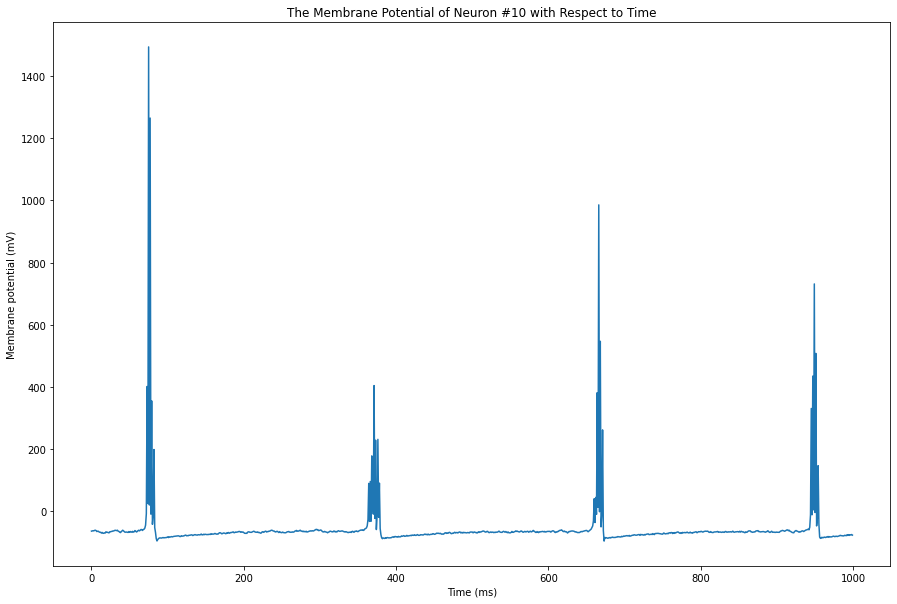

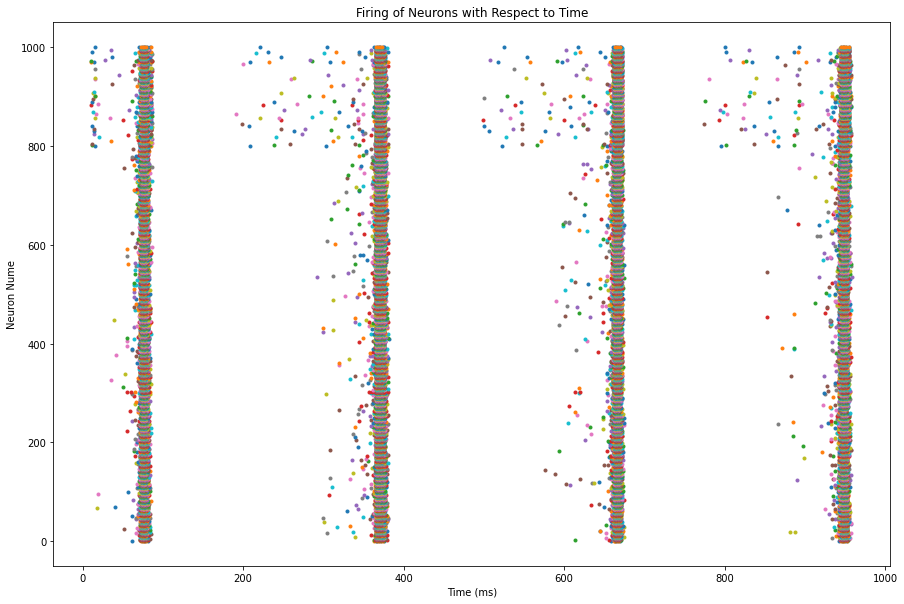

In [ ]:
plt.figure(figsize=(15,10))
plt.title("The Membrane Potential of Neuron #10 with Respect to Time")
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.plot(np.arange(time_steps), voltage_across_time);
plt.show()

plt.figure(figsize=(15,10))
plt.title("Firing of Neurons with Respect to Time")
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Nume')
plt.plot(time, firing_map, ".");
plt.show()